# 1. Preparación de entorno. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from pmdarima import auto_arima
%pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
import ruptures as rpt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

Note: you may need to restart the kernel to use updated packages.


# 2. Carga de datos. 

In [2]:
# Load the river hydrology data
df_rivers = pd.read_csv("../data/processed/rivers/river_hydrology_data_clean.csv")
df_rivers.head()

,Date,Value,Measurement_Types,Location
0,1998-01-01,0.0,1,1
1,1998-01-02,0.0,1,1
2,1998-01-03,0.0,1,1
3,1998-01-04,0.0,1,1
4,1998-01-05,0.0,1,1


# 3. Definir Features (X) y Variable Target (Y). 

Para definir las variables features y la variable target, se considerarán los datos que nos son útiles para visualizar el nivel de agua según la fecha de cada cuerpo de agua, en este caso __"Value"__ es la variable target, mientras que el resto de las variables se considerarán variables feature.

# 4. Dividir data en train y test. 

/Users/bereniceramos/miniconda3/envs/new_pmdarima_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/bereniceramos/miniconda3/envs/new_pmdarima_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/bereniceramos/miniconda3/envs/new_pmdarima_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Primeros valores reales:
 Date
2019-01-01    0.0
2019-01-01    0.0
2019-01-01    0.0
2019-01-01    0.0
2019-01-01    0.0
Name: Value, dtype: float64
Primeros valores predicción:
 Date
2019-01-01    0.058379
2019-01-01    0.058379
2019-01-01    0.058379
2019-01-01    0.058379
2019-01-01    0.058379
dtype: float64


/Users/bereniceramos/miniconda3/envs/new_pmdarima_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/bereniceramos/miniconda3/envs/new_pmdarima_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


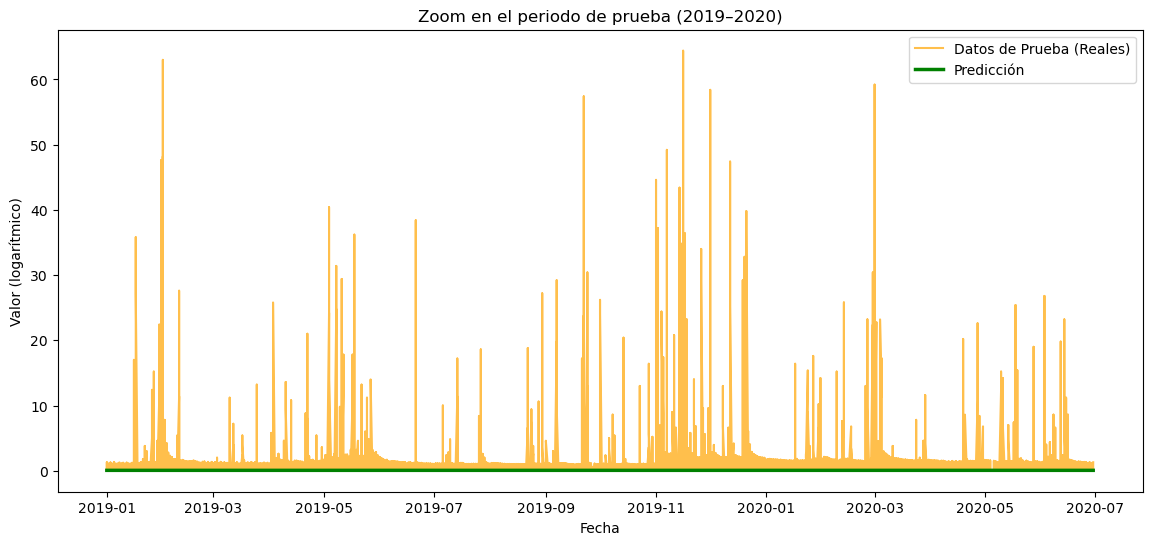

In [10]:
# =======================
# 1. Preparar datos
# =======================
df_rivers["Date"] = pd.to_datetime(df_rivers["Date"])
total_data = df_rivers.set_index("Date").sort_index()
df = total_data["Value"]

# =======================
# 2. Train / Test
# =======================
train = df.loc[:'2018']
test  = df.loc['2019':]

# =======================
# 3. Modelo ARIMA
# =======================
model = ARIMA(train, order=(0,1,1))
model_fit = model.fit()

# =======================
# 4. Forecast alineado
# =======================
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast.values, index=test.index)  # <- alineamos con test

# Verificación
print("Primeros valores reales:\n", test.head())
print("Primeros valores predicción:\n", forecast.head())

# =======================
# 5. Graficar con más visibilidad
# =======================
plt.figure(figsize=(14,6))
plt.plot(test.index, test, label="Datos de Prueba (Reales)", color="orange", alpha=0.7)
plt.plot(forecast.index, forecast, label="Predicción", color="green", linewidth=2.5)
plt.title("Zoom en el periodo de prueba (2019–2020)")
plt.xlabel("Fecha")
plt.ylabel("Valor (logarítmico)")
plt.legend()
plt.show()


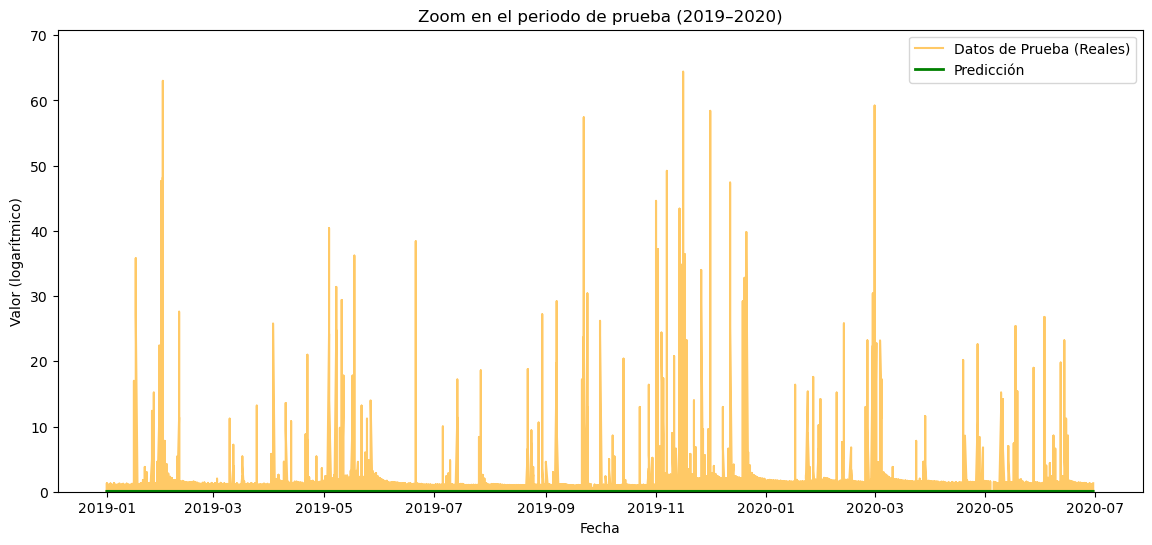

In [11]:
import matplotlib.pyplot as plt

# Gráfica con zoom al periodo de prueba
plt.figure(figsize=(14,6))
plt.plot(test.index, test, label='Datos de Prueba (Reales)', color='orange', alpha=0.6)
plt.plot(forecast.index, forecast, label='Predicción', color='green', linewidth=2)

plt.title("Zoom en el periodo de prueba (2019–2020)")
plt.xlabel("Fecha")
plt.ylabel("Valor (logarítmico)")

# --- Ajustes útiles ---
plt.legend()
plt.ylim([0, max(test.max(), forecast.max())*1.1])  # escala automática para incluir predicciones
plt.show()


In [4]:
# total_data = df_lakes.set_index("Date")
# total_data.head()

In [5]:
# # =======================
# # 1. Preparar los datos
# # =======================
# # Asegúrate de que total_data tiene la columna 'Fecha'
# df_rivers["Date"] = pd.to_datetime(df_rivers["Date"])
# total_data = df_rivers.set_index("Date").sort_index()

# # Nos quedamos con la serie univariada
# df = total_data["Value"]

# # =======================
# # 2. Split train/test
# # =======================
# train = df.loc[:'2018']   # entrenamiento hasta 2018
# test  = df.loc['2019':]   # prueba 2019-2020

# # =======================
# # 3. Entrenar modelo ARIMA
# # =======================
# model = ARIMA(train, order=(1,1,1))  # ajusta (p,d,q) según tu ACF/PACF
# model_fit = model.fit()

# # =======================
# # 4. Predicción para test
# # =======================
# forecast = model_fit.forecast(steps=len(test))
# forecast = pd.Series(forecast, index=test.index)

# # =======================
# # 5. Gráfica completa
# # =======================
# plt.figure(figsize=(14,6))
# plt.plot(train.index, train, label='Datos de Entrenamiento', color='blue', alpha=0.6)
# plt.plot(test.index, test, label='Datos de Prueba (Reales)', color='orange')
# plt.plot(forecast.index, forecast, label='Predicción', color='green')
# plt.title("Proyección de la Serie de Tiempo con Modelo ARIMA (1997–2020)")
# plt.xlabel("Fecha")
# plt.ylabel("Valor (logarítmico)")  # cámbialo si no aplicaste log
# plt.legend()
# plt.show()

# # =======================
# # 6. Gráfica zoom en 2019–2020
# # =======================
# plt.figure(figsize=(14,6))
# plt.plot(test.index, test, label='Datos de Prueba (Reales)', color='orange')
# plt.plot(forecast.index, forecast, label='Predicción', color='green')
# plt.title("Zoom en el periodo de prueba (2019–2020)")
# plt.xlabel("Fecha")
# plt.ylabel("Valor (logarítmico)")
# plt.legend()
# plt.show()


In [6]:
# # Suponiendo que tu DataFrame se llama df y la serie está en la columna 'valor'
# # y que df.index es de tipo datetime (muy importante)
# df = total_data['Value'].sort_index()

# # Dividir en train y test
# train = df.loc[:'2018']   # entrenamiento hasta 2018
# test  = df.loc['2019':]   # prueba 2019-2020

# # Ajustar modelo ARIMA (ajusta p,d,q según tu caso)
# model = ARIMA(train, order=(1,1,1))
# model_fit = model.fit()

# # Hacer predicción para el mismo rango temporal que test
# forecast = model_fit.forecast(steps=len(test))
# forecast = pd.Series(forecast, index=test.index)   # <- aquí corregimos el índice

# # Graficar
# plt.figure(figsize=(14,6))
# plt.plot(train.index, train, label='Datos de Entrenamiento', color='blue')
# plt.plot(test.index, test, label='Datos de Prueba (Reales)', color='orange')
# plt.plot(forecast.index, forecast, label='Predicción', color='green')

# plt.title("Proyección de la Serie de Tiempo con Modelo ARIMA")
# plt.xlabel("Fecha")
# plt.ylabel("Valor (logarítmico)")  # si aplicaste log-transform
# plt.legend()
# plt.show()


In [7]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA

# # =======================
# # 1. Preparar los datos
# # =======================
# # Suponiendo que tu df tiene la columna 'fecha' y 'valor'
# df["fecha"] = pd.to_datetime(df["fecha"])
# df = df.set_index("fecha").sort_index()

# # Nos quedamos solo con la columna de interés (univariada)
# series = df["valor"]

# # =======================
# # 2. Split train/test
# # =======================
# train = series.loc[:'2018']
# test  = series.loc['2019':]

# # =======================
# # 3. Entrenar modelo ARIMA
# # =======================
# # Ajusta order=(p,d,q) según tu caso
# model = ARIMA(train, order=(1,1,1))
# model_fit = model.fit()

# # =======================
# # 4. Predicciones
# # =======================
# forecast = model_fit.forecast(steps=len(test))
# forecast = pd.Series(forecast, index=test.index)  # alineamos con fechas reales

# # =======================
# # 5. Gráfica completa
# # =======================
# plt.figure(figsize=(14,6))
# plt.plot(train.index, train, label='Datos de Entrenamiento', color='blue', alpha=0.6)
# plt.plot(test.index, test, label='Datos de Prueba (Reales)', color='orange')
# plt.plot(forecast.index, forecast, label='Predicción', color='green')
# plt.title("Proyección de la Serie de Tiempo con Modelo ARIMA")
# plt.xlabel("Fecha")
# plt.ylabel("Valor (logarítmico)")  # cambia si no aplicaste log
# plt.legend()
# plt.show()

# # =======================
# # 6. Gráfica solo 2019–2020 (zoom para claridad)
# # =======================
# plt.figure(figsize=(14,6))
# plt.plot(test.index, test, label='Datos de Prueba (Reales)', color='orange')
# plt.plot(forecast.index, forecast, label='Predicción', color='green')
# plt.title("Zoom en el periodo de prueba (2019–2020)")
# plt.xlabel("Fecha")
# plt.ylabel("Valor (logarítmico)")
# plt.legend()
# plt.show()
